In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv('/content/Iris.csv')

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
df['Species'] = encoder.fit_transform(df['Species'])

In [13]:
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [14]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [15]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

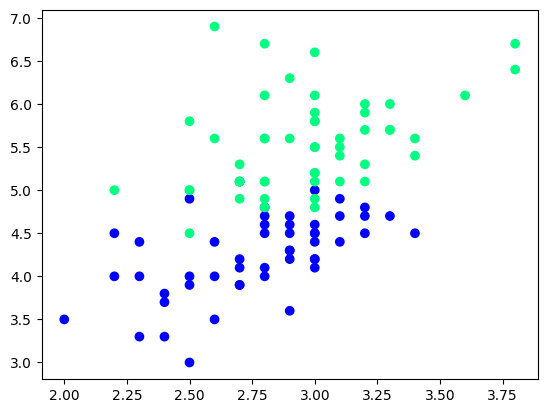

In [17]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [18]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
108,2.5,5.8,2
91,3.0,4.6,1
80,2.4,3.8,1
98,2.5,3.0,1
56,3.3,4.7,1
60,2.0,3.5,1
53,2.3,4.0,1
104,3.0,5.8,2
69,2.5,3.9,1


In [20]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [21]:
df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
76,2.8,4.8,1
148,3.4,5.4,2
140,3.1,5.6,2
149,3.0,5.1,2
106,2.5,4.5,2
82,2.7,3.9,1
142,2.7,5.1,2
109,3.6,6.1,2
94,2.7,4.2,1


In [22]:
df_val

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
80,2.4,3.8,1
85,3.4,4.5,1
64,2.9,3.6,1
93,2.3,3.3,1


In [23]:
df_test

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
132,2.8,5.6,2
103,2.9,5.6,2
138,3.0,4.8,2
71,2.8,4.0,1


In [24]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [25]:
y_test

array([2, 1, 1, 1, 1])

# Case 1 - Bagging

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [41]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
106,2.5,4.5,2
82,2.7,3.9,1
140,3.1,5.6,2
148,3.4,5.4,2
109,3.6,6.1,2
142,2.7,5.1,2
149,3.0,5.1,2
106,2.5,4.5,2


In [43]:
dt_bag1 = DecisionTreeClassifier()

## Evaluate

In [44]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


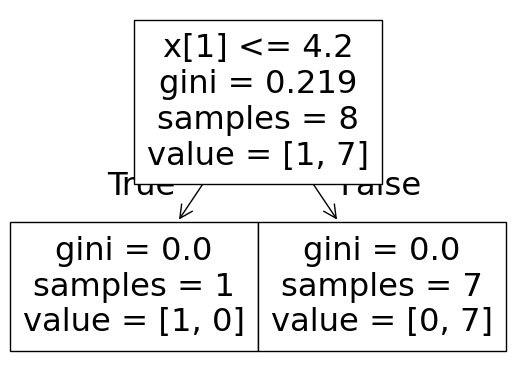

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


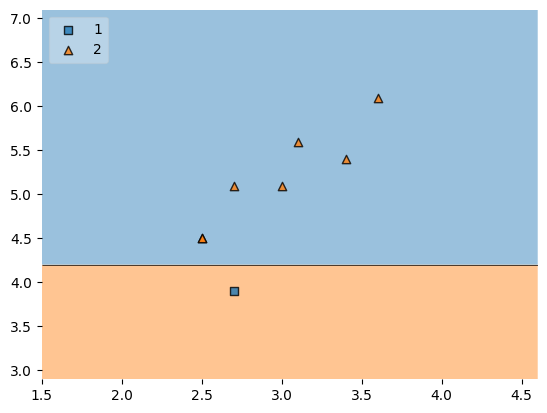

In [45]:
evaluate(dt_bag1,X,y)

In [46]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
94,2.7,4.2,1
82,2.7,3.9,1
106,2.5,4.5,2
149,3.0,5.1,2
76,2.8,4.8,1
106,2.5,4.5,2
148,3.4,5.4,2


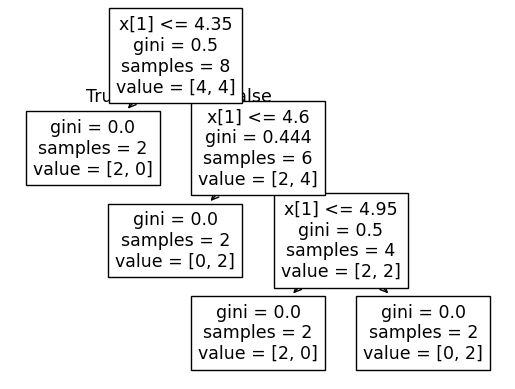

0.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


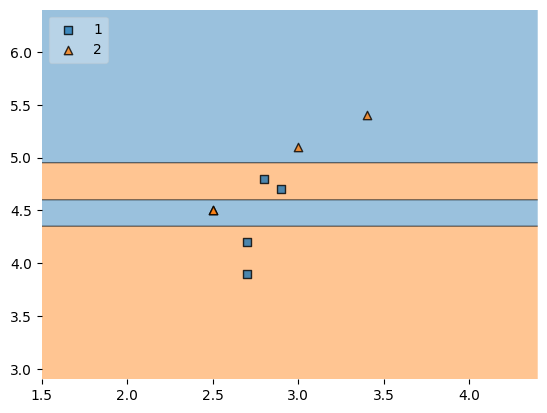

In [47]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
142,2.7,5.1,2
148,3.4,5.4,2
82,2.7,3.9,1
109,3.6,6.1,2
82,2.7,3.9,1
94,2.7,4.2,1
106,2.5,4.5,2


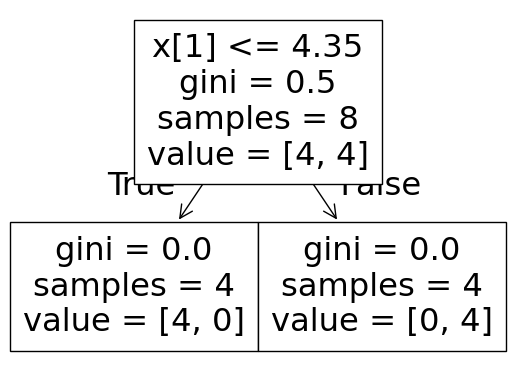

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


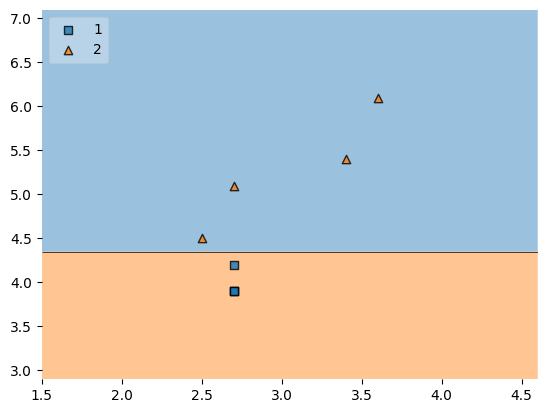

In [49]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [50]:
df_test

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
132,2.8,5.6,2
103,2.9,5.6,2
138,3.0,4.8,2
71,2.8,4.0,1


In [54]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,4.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,4.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,4.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(




# Pasting

In [ ]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
131,3.8,6.4,2
137,3.1,5.5,2
130,2.8,6.1,2
145,3.0,5.2,2
52,3.1,4.9,1
96,2.9,4.2,1
75,3.0,4.4,1
100,3.3,6.0,2
53,2.3,4.0,1


In [ ]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
52,3.1,4.9,1
122,2.8,6.7,2
130,2.8,6.1,2
53,2.3,4.0,1
96,2.9,4.2,1
145,3.0,5.2,2
75,3.0,4.4,1


# Random Subspaces

In [ ]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Species
134,2.6,Iris-virginica
12,3.0,Iris-setosa
13,3.0,Iris-setosa
146,2.5,Iris-virginica
38,3.0,Iris-setosa
62,2.2,Iris-versicolor
77,3.0,Iris-versicolor
45,3.0,Iris-setosa
109,3.6,Iris-virginica
10,3.7,Iris-setosa


# Random Patches

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
38,4.4,39
10,5.4,11
109,7.2,110
62,6.0,63
134,6.1,135
12,4.8,13
10,5.4,11
134,6.1,135
